In [11]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

from skimage import io
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from sklearn.mixture import GaussianMixture

from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import LatentDirichletAllocation
%matplotlib inline

df = pd.read_csv('Heart Attack Data Set.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
avg_age = df["age"].astype("float").mean(axis=0)
df["age"].replace(np.nan, avg_age, inplace = True)
df["age"] = df["age"].astype("float")

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
X = df.drop(['target'], axis = 1)
y = df['target']
scaler = StandardScaler()
X_std=scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_values = np.cumsum(exp_var_pca)

new_X = pd.DataFrame(X_pca)
new_X.head()

,0,1
0,0.624111,2.321270
1,-0.455988,-0.957351
2,-1.828805,0.042885
3,-1.716006,-0.495337
4,-0.371356,0.301156


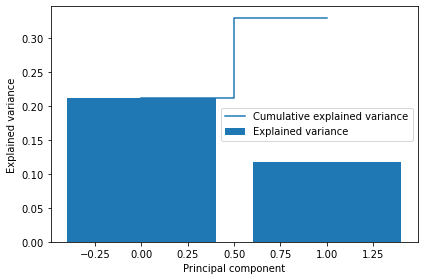

In [10]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_values)), cum_sum_values, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

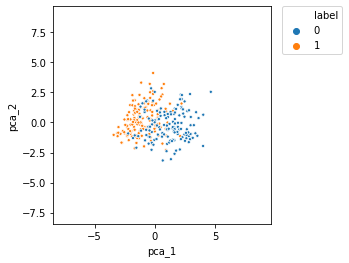

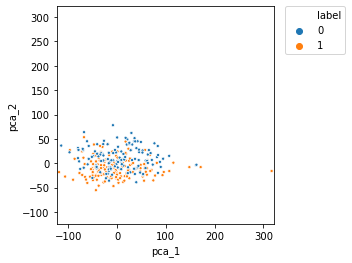

In [12]:
pca=PCA(n_components=2)
pca_result = pca.fit_transform(X) 

pca_result_df = pd.DataFrame({'pca_1': X_pca[:,0], 'pca_2': X_pca[:,1], 'label': y})
pca_result_df2 = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (X_pca.min()-5, X_pca.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

fig2, ax2 = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df2, ax=ax2,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax2.set_xlim(lim)
ax2.set_ylim(lim)
ax2.set_aspect('equal')
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

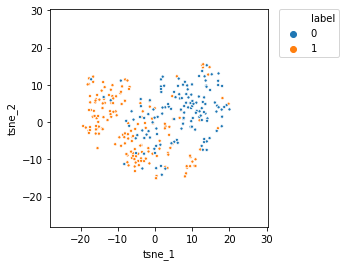

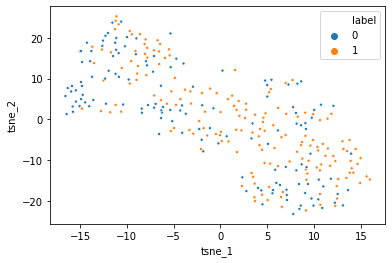

In [13]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X_std)

tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal'ss)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
tsne2 = TSNE(n_components=2)
tsne_result2 = tsne.fit_transform(X)

tsne_result_df2 = pd.DataFrame({'tsne_1': tsne_result2[:,0], 'tsne_2': tsne_result2[:,1], 'label': y})

fig2, ax2 = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df2, ax=ax2,s=10)
lim = (tsne_result2.min()-5, tsne_result2.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [11]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(scaled_X_train, y_train)
y_pred = tree.predict(scaled_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        85
           1       0.75      0.81      0.78        97

    accuracy                           0.76       182
   macro avg       0.76      0.75      0.76       182
weighted avg       0.76      0.76      0.76       182



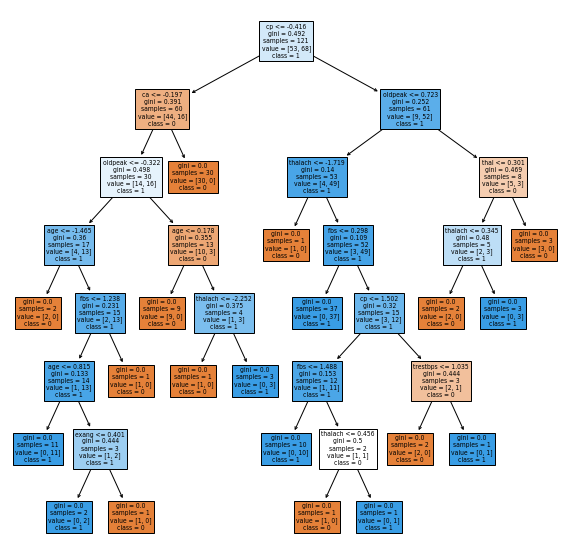

In [17]:

plt.figure(figsize = (10, 10))
plot_tree(tree, feature_names = ['age', 'sex', 'cp','chol','fbs','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal'], 
          class_names = ['0', '1'], filled = True)
plt.show()

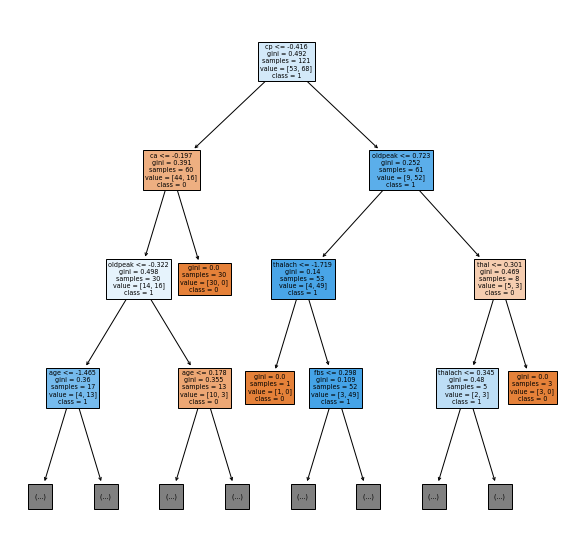

In [18]:
plt.figure(figsize = (10, 10))
plot_tree(tree, max_depth = 3, feature_names = ['age', 'sex', 'cp','chol','fbs','trestbps','restecg','thalach','exang','oldpeak','slope','ca','thal'], 
          class_names = ['0', '1'], filled = True)
plt.show()

In [19]:
SVM = SVC(C=10.0, gamma = 0.01, kernel = 'rbf')
SVM.fit(scaled_X_train,y_train)
y_pred = SVM.predict(scaled_X_test)
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

[[60 25]
 [ 7 90]]

              precision    recall  f1-score   support

           0       0.90      0.71      0.79        85
           1       0.78      0.93      0.85        97

    accuracy                           0.82       182
   macro avg       0.84      0.82      0.82       182
weighted avg       0.84      0.82      0.82       182



In [21]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train,y_train)
grid.best_estimator_

SVC(C=1000, gamma=0.0001)

In [22]:
grid_predictions = grid.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions))
print()
print(classification_report(y_test,grid_predictions))

[[60 25]
 [ 7 90]]

              precision    recall  f1-score   support

           0       0.90      0.71      0.79        85
           1       0.78      0.93      0.85        97

    accuracy                           0.82       182
   macro avg       0.84      0.82      0.82       182
weighted avg       0.84      0.82      0.82       182



In [23]:
RFC = RandomForestClassifier()
RFC.fit(scaled_X_train,y_train)
predictions = RFC.predict(scaled_X_test)
print(classification_report(y_test,predictions))

print('conf matrix:\n',confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76        85
           1       0.77      0.89      0.82        97

    accuracy                           0.80       182
   macro avg       0.81      0.79      0.79       182
weighted avg       0.80      0.80      0.79       182

conf matrix:
 [[59 26]
 [11 86]]


In [24]:
param_grid = {'max_depth': [5, 15, 30, 50],
 'min_samples_leaf': [1, 2, 4, 8],
 'min_samples_split': [2, 4, 8],
 'n_estimators': [100, 200, 400, 600]}
grid2 = GridSearchCV(RandomForestClassifier(), param_grid, refit=True)
grid2.fit(scaled_X_train,y_train)
print(grid2.best_params_)
print(grid2.best_estimator_)

{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=200)


In [25]:
grid_predictions2 = grid2.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions2))
print()
print(classification_report(y_test,grid_predictions2))

[[60 25]
 [12 85]]

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        85
           1       0.77      0.88      0.82        97

    accuracy                           0.80       182
   macro avg       0.80      0.79      0.79       182
weighted avg       0.80      0.80      0.79       182



In [27]:
ADA = AdaBoostClassifier(n_estimators=100, random_state=0)
ADA.fit(scaled_X_train,y_train)
ADA_predict = ADA.predict(scaled_X_test)
print(confusion_matrix(y_test,ADA_predict))
print()
print(classification_report(y_test,ADA_predict))

[[57 28]
 [13 84]]

              precision    recall  f1-score   support

           0       0.81      0.67      0.74        85
           1       0.75      0.87      0.80        97

    accuracy                           0.77       182
   macro avg       0.78      0.77      0.77       182
weighted avg       0.78      0.77      0.77       182



In [28]:
param_grid3 = {'n_estimators':[100,250, 500, 800],
              'learning_rate':[0.01,0.1, 3]}
grid3 = GridSearchCV(AdaBoostClassifier(), param_grid3, refit=True)
grid3.fit(scaled_X_train,y_train)
print(grid3.best_params_)
print(grid3.best_estimator_)

{'learning_rate': 0.1, 'n_estimators': 250}
AdaBoostClassifier(learning_rate=0.1, n_estimators=250)


In [29]:
grid_predictions3 = grid3.predict(scaled_X_test)
print(confusion_matrix(y_test,grid_predictions3))
print()
print(classification_report(y_test,grid_predictions3))

[[58 27]
 [13 84]]

              precision    recall  f1-score   support

           0       0.82      0.68      0.74        85
           1       0.76      0.87      0.81        97

    accuracy                           0.78       182
   macro avg       0.79      0.77      0.78       182
weighted avg       0.78      0.78      0.78       182



In [1]:
def recreate_image(codebook, labels, w, h):
    
    return codebook[labels].reshape(w, h, -1)

def cluster_image(img, n_colors):
    reshaped_img = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))
    img_sample = shuffle(reshaped_img, random_state=0, n_samples=1000)
    kmeans2 = KMeans(n_clusters=n_colors, random_state=0).fit(img_sample)
    labels = kmeans2.predict(reshaped_img)
    result = recreate_image(kmeans2.cluster_centers_, labels, img.shape[0], img.shape[1])
    return result

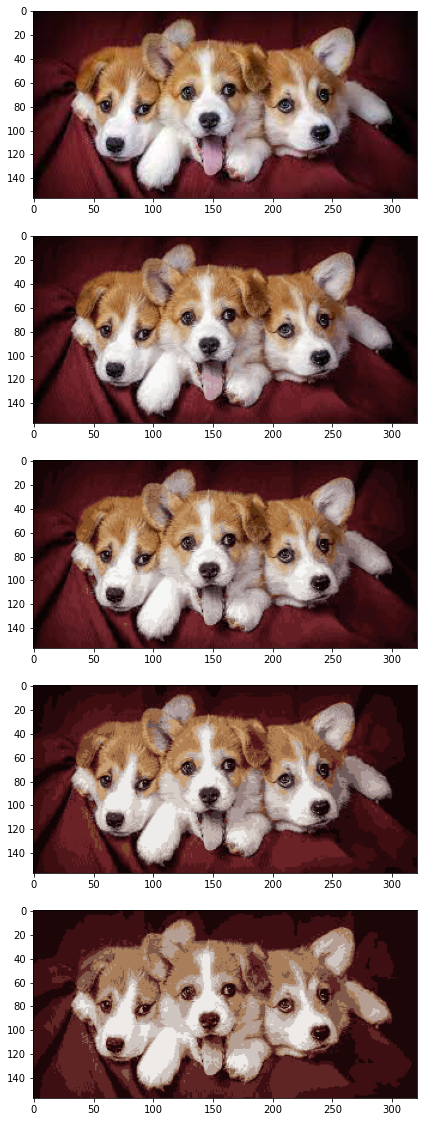

In [8]:
dogs = io.imread("dogs.jpg").astype(np.float64)/255


fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(16,20))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)

ax[0].imshow(dogs)
ax[1].imshow(cluster_image(dogs, 64))
ax[2].imshow(cluster_image(dogs, 32))
ax[3].imshow(cluster_image(dogs, 16))
ax[4].imshow(cluster_image(dogs, 8))


<ipython-input-12-32ab45abb854>:8: RuntimeWarning: covariance is not positive-semidefinite.
  x_1 = np.random.multivariate_normal(mean1, cov1, (number_of_points))
<ipython-input-12-32ab45abb854>:9: RuntimeWarning: covariance is not positive-semidefinite.
  x_2 = np.random.multivariate_normal(mean2, cov2, (number_of_points*3))


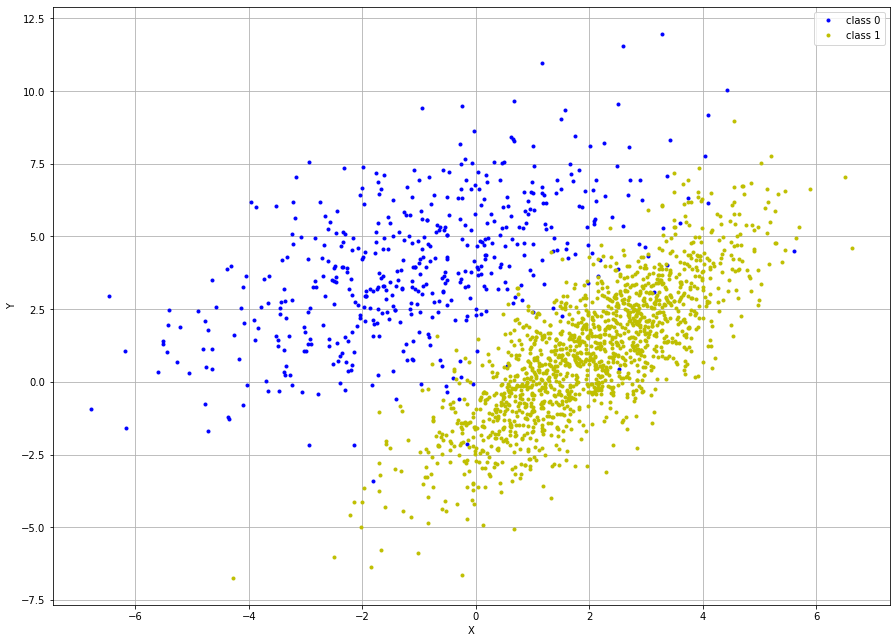

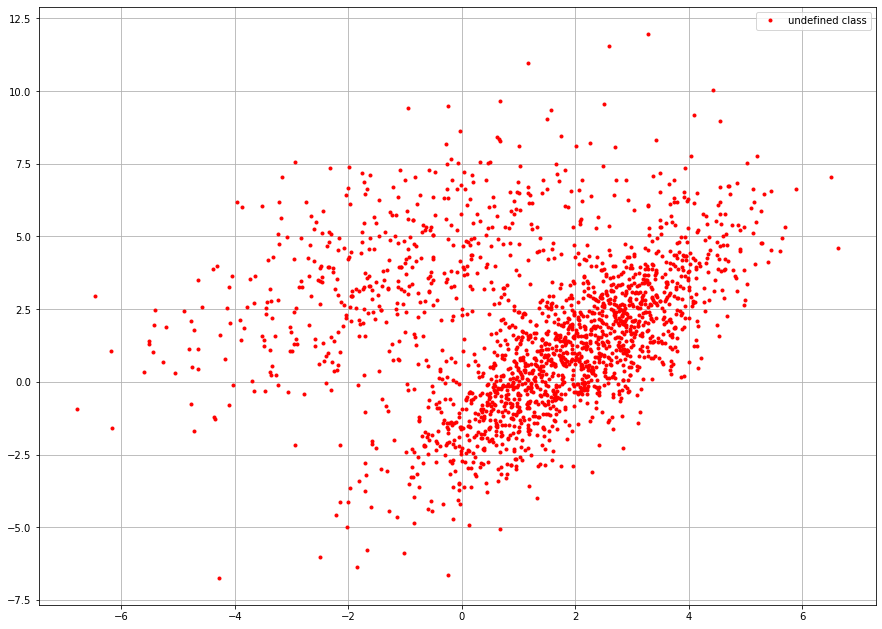

In [12]:
number_of_points = 500
mean1 = [-1,4]
cov1 = [[1, 5],
        [5, 5]]
mean2 = [2,1]
cov2 = [[1, 3], 
        [3, 5]]
x_1 = np.random.multivariate_normal(mean1, cov1, (number_of_points))
x_2 = np.random.multivariate_normal(mean2, cov2, (number_of_points*3))
plt.figure(figsize=(15,11))
plt.plot(x_1[...,0], x_1[...,1], 'b.', label = "class 0")
plt.plot(x_2[...,0], x_2[...,1], 'y.', label = "class 1")
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.legend()
plt.show()

x = np.concatenate([x_1,x_2])
plt.figure(figsize=(15,11))
plt.plot(x[...,0], x[...,1], 'r.', label = "undefined class")
plt.grid()
plt.legend()
plt.show()

In [13]:
gm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gm.fit(x)
print("Means: ")
print(gm.means_)
print("True means: ")
print(np.stack([mean2, mean1]))
print("Difference of means: ")
print(gm.means_ - np.stack([mean2, mean1]))
print("____________________________________________")
print("Covariation matrixes: ")
print(gm.covariances_)
print("True covariation matrixes: ")
print(np.stack([cov2, cov1]))
print("Difference of covariation matrixes: ")
print(gm.covariances_ - np.stack([cov2, cov1]))
print("Weights:")
print(gm.weights_)

Means: 
[[ 1.98368901  0.90551218]
 [-0.6879246   3.91257484]]
True means: 
[[ 2  1]
 [-1  4]]
Difference of means: 
[[-0.01631099 -0.09448782]
 [ 0.3120754  -0.08742516]]
____________________________________________
Covariation matrixes: 
[[[2.04864757 2.5677193 ]
  [2.5677193  5.0379438 ]]

 [[4.81281485 2.5726123 ]
  [2.5726123  5.73378751]]]
True covariation matrixes: 
[[[1 3]
  [3 5]]

 [[1 5]
  [5 5]]]
Difference of covariation matrixes: 
[[[ 1.04864757 -0.4322807 ]
  [-0.4322807   0.0379438 ]]

 [[ 3.81281485 -2.4273877 ]
  [-2.4273877   0.73378751]]]
Weights:
[0.72547302 0.27452698]


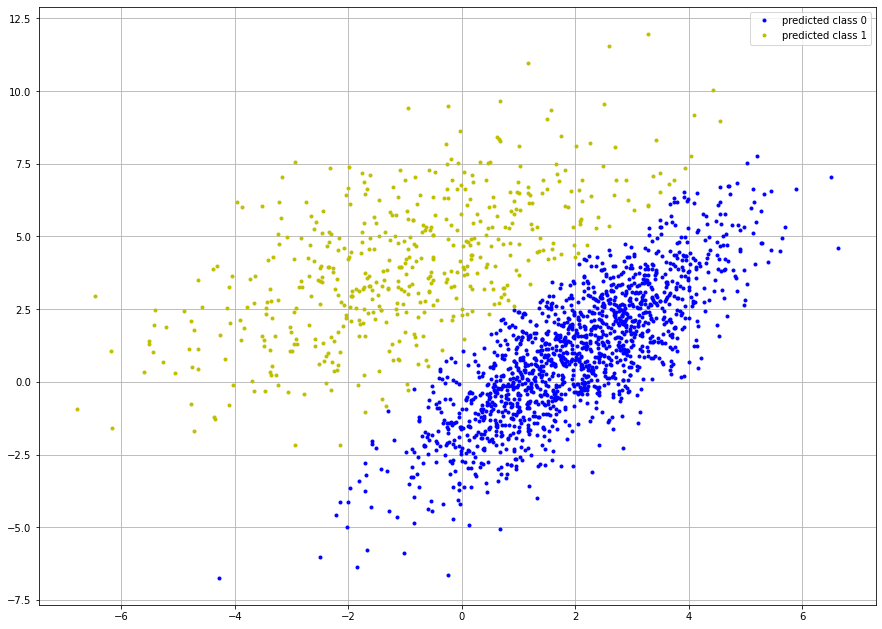

In [14]:
y_predict = gm.predict(x)
x_pred0 = x[y_predict == 0]
x_pred1 = x[y_predict == 1]
plt.figure(figsize=(15,11))
plt.plot(x_pred0[...,0], x_pred0[...,1], 'b.', label = "predicted class 0")
plt.plot(x_pred1[...,0], x_pred1[...,1], 'y.', label = "predicted class 1")
plt.grid()
plt.legend()
plt.show()

In [49]:
text_data = pd.read_csv('fake_or_real_news.csv', encoding='latin-1')

classes = text_data.label.unique()

text_data = text_data.drop(columns=['Unnamed: 0','title'], axis = 1)
text_data.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"â Kaydee King (@KaydeeKing) November 9, 2016...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [50]:
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    
    return text
for i in range(text_data['text'].shape[0]):
    text_data.loc[i, 'text'] = clean_text(text_data.loc[i, 'text'])

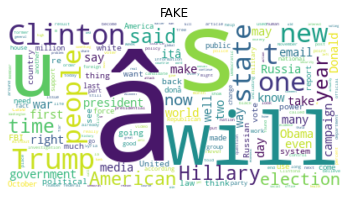

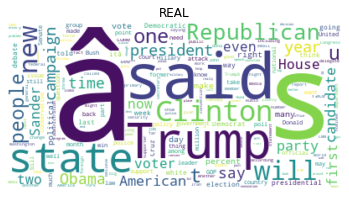

In [48]:
from wordcloud import WordCloud
def visualize_class_words(mass, class_label):
    big_row = ' '
    
    for row in mass[mass.label == class_label].text:
        big_row+=(str(row))+' '
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(big_row)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(class_label)
    plt.axis("off")
    plt.show()

for i in classes:
    visualize_class_words(text_data, i)

In [51]:


text_data_train = text_data.loc[:2534]
text_data_test = text_data.loc[2534:]


In [53]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=0.05, decode_error='ignore', encoding=None)

tfidf_train = tfidf_vectorizer.fit_transform(text_data_train.text)
tfidf_test =  tfidf_vectorizer.transform(text_data_test.text)

clf = LogisticRegression().fit(tfidf_train, text_data_train.label)

predicted = clf.predict(tfidf_test)
print(classification_report(text_data_test.label, predicted))

              precision    recall  f1-score   support

        FAKE       0.88      0.90      0.89      1867
        REAL       0.90      0.88      0.89      1934

    accuracy                           0.89      3801
   macro avg       0.89      0.89      0.89      3801
weighted avg       0.89      0.89      0.89      3801



In [54]:
text_data = pd.read_csv('fake_or_real_news.csv', encoding='latin-1')

text_data = text_data.drop(columns=['Unnamed: 0','title'], axis = 1)

for i in range(text_data['text'].shape[0]):
    text_data.loc[i, 'text'] = clean_text(text_data.loc[i, 'text'])

text_data_train = text_data.loc[:2534]
text_data_test = text_data.loc[2534:]

positive_data_train = text_data_train[text_data_train.label == 'REAL']
negative_data_train = text_data_train[text_data_train.label == 'FAKE']
extreme_data_train = pd.concat([positive_data_train, negative_data_train])

positive_data_test = text_data_test[text_data_test.label == 'REAL']
negative_data_test = text_data_test[text_data_test.label == 'FAKE']
extreme_data_test = pd.concat([positive_data_test, negative_data_test])

In [56]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_train = tfidf_vectorizer.fit_transform(extreme_data_train.text)
tfidf_test =  tfidf_vectorizer.transform(extreme_data_test.text)

clf = LogisticRegression().fit(tfidf_train, extreme_data_train.label)

predicted = clf.predict(tfidf_test)
print(classification_report(extreme_data_test.label, predicted))

              precision    recall  f1-score   support

        FAKE       0.88      0.92      0.90      1867
        REAL       0.92      0.88      0.90      1934

    accuracy                           0.90      3801
   macro avg       0.90      0.90      0.90      3801
weighted avg       0.90      0.90      0.90      3801



In [57]:
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=0)

tfidf_train = tfidf_vectorizer.fit_transform(extreme_data_train.text)
tfidf_test =  tfidf_vectorizer.transform(extreme_data_test.text)

clf = LogisticRegression().fit(tfidf_train, extreme_data_train.label)

predicted = clf.predict(tfidf_test)
print(classification_report(extreme_data_test.label, predicted))

              precision    recall  f1-score   support

        FAKE       0.86      0.93      0.90      1867
        REAL       0.93      0.85      0.89      1934

    accuracy                           0.89      3801
   macro avg       0.90      0.89      0.89      3801
weighted avg       0.90      0.89      0.89      3801



In [58]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_train = tfidf_vectorizer.fit_transform(extreme_data_train.text)
tfidf_test =  tfidf_vectorizer.transform(extreme_data_test.text)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500)
rfc.fit(tfidf_train,extreme_data_train.label)
predictions = rfc.predict(tfidf_test)
print(classification_report(extreme_data_test.label,predictions))

              precision    recall  f1-score   support

        FAKE       0.89      0.90      0.89      1867
        REAL       0.90      0.89      0.90      1934

    accuracy                           0.90      3801
   macro avg       0.90      0.90      0.90      3801
weighted avg       0.90      0.90      0.90      3801



In [60]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_train = tfidf_vectorizer.fit_transform(text_data_train.text)
tfidf_test =  tfidf_vectorizer.transform(text_data_test.text)

rfc = RandomForestClassifier()
rfc.fit(tfidf_train,text_data_train.label)
predictions = rfc.predict(tfidf_test)
print(classification_report(text_data_test.label,predictions))

              precision    recall  f1-score   support

        FAKE       0.88      0.89      0.88      1867
        REAL       0.89      0.88      0.89      1934

    accuracy                           0.88      3801
   macro avg       0.88      0.88      0.88      3801
weighted avg       0.88      0.88      0.88      3801



In [61]:
def plot_top_words(model, feature_names, title, n_top_words=10):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

C:\Users\ilaiz\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-63-97c51821baef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_data_train.loc[i, 'text'] = clean_text(text_data_train.loc[i, 'text'])


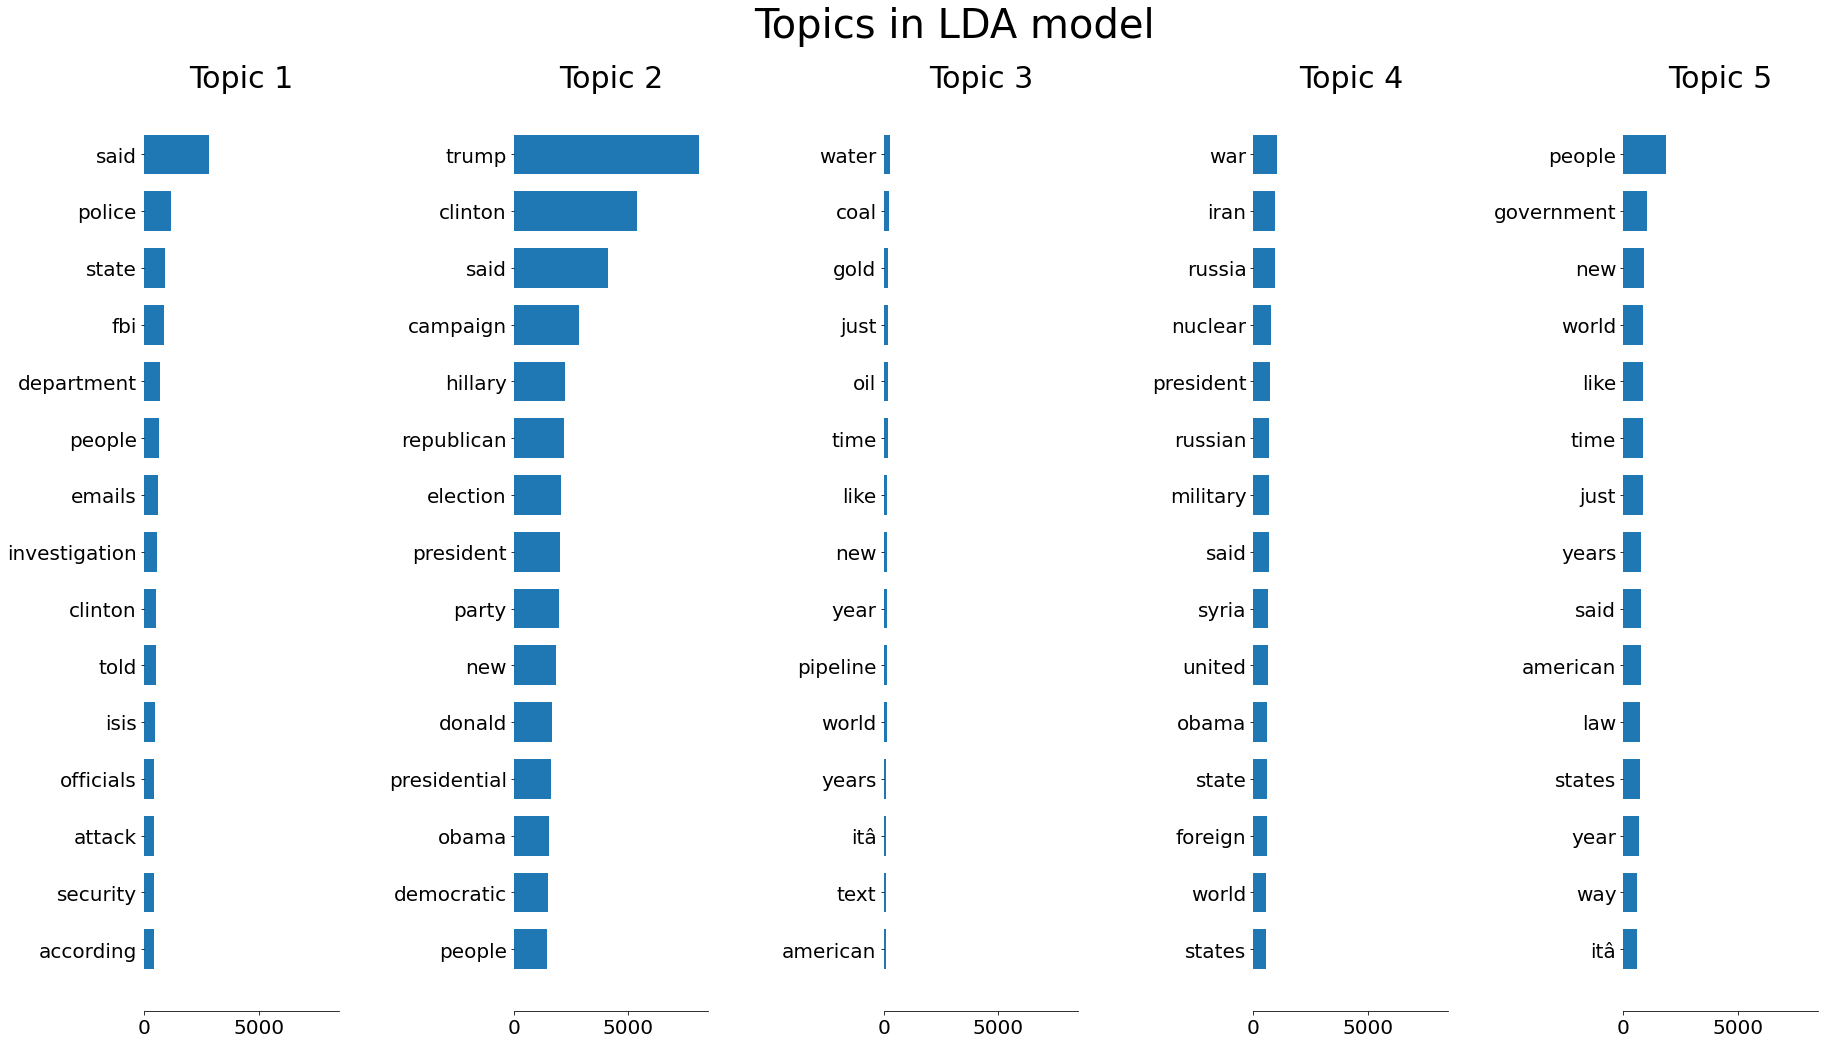

In [63]:
vectorizer = CountVectorizer(stop_words='english')
for i in range(text_data_train['text'].shape[0]):
    text_data_train.loc[i, 'text'] = clean_text(text_data_train.loc[i, 'text'])
data_vectorized = vectorizer.fit_transform(text_data_train.text)

lda = LatentDirichletAllocation(n_components=5, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names()
plot_top_words(lda, feature_names, 'Topics in LDA model', n_top_words=15)